In [1]:
import mysql.connector 
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import config
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [2]:
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database= 'Dog_Breeds'
)
cursor = cnx.cursor()

# cursor.close()
# cnx.close()

In [15]:
df.corr()


,Male_Min_Weight,Female_Min_Weight,Male_Max_Weight,Female_Max_Weight,Male_Height,Female_Height,Exercise_Min_Min_Daily,Exercise_Max_Min_Daily,Energy_Level,Longevity_Min,Longevity_Max,Tend_Drool,Tend_Snore,Tend_Bark,Tend_Dig,Attention_Needs,Grooming_Needs,Prevalence
Male_Min_Weight,1.000000,NaN,0.975698,NaN,0.805378,0.626536,0.205052,2.202772e-01,-0.374635,-0.593346,-0.583857,5.066353e-01,-0.015931,-0.498930,-0.309763,-0.202889,-0.165275,-0.086004
Female_Min_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male_Max_Weight,0.975698,NaN,1.000000,NaN,0.807649,0.631295,0.178831,1.761849e-01,-0.326206,-0.573453,-0.562788,4.933440e-01,0.009655,-0.494878,-0.309462,-0.168607,-0.132121,-0.067822
Female_Max_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male_Height,0.805378,NaN,0.807649,NaN,1.000000,0.765555,0.335609,2.879350e-01,-0.203341,-0.474711,-0.489457,3.107758e-01,-0.140909,-0.510939,-0.268095,-0.289419,-0.205722,0.006358
Female_Height,0.626536,NaN,0.631295,NaN,0.765555,1.000000,0.282449,2.428712e-01,-0.088867,-0.335125,-0.312905,1.591431e-01,-0.278157,-0.357972,-0.121323,-0.270717,-0.099920,0.104290
Exercise_Min_Min_Daily,0.205052,NaN,0.178831,NaN,0.335609,0.282449,1.000000,6.733240e-01,0.263586,0.072905,0.073428,-6.287328e-02,-0.097711,-0.021691,-0.031728,-0.194399,-0.084891,0.051716
Exercise_Max_Min_Daily,0.220277,NaN,0.176185,NaN,0.287935,0.242871,0.673324,1.000000e+00,0.125754,0.027275,0.022363,-8.494753e-17,-0.306673,0.208430,0.074564,-0.106790,0.018382,0.117568
Energy_Level,-0.374635,NaN,-0.326206,NaN,-0.203341,-0.088867,0.263586,1.257540e-01,1.000000,0.212052,0.191716,-2.424314e-01,-0.237310,0.269233,0.015960,0.102518,0.000000,0.080755
Longevity_Min,-0.593346,NaN,-0.573453,NaN,-0.474711,-0.335125,0.072905,2.727522e-02,0.212052,1.000000,0.929961,-3.961435e-01,0.058548,0.389662,0.024385,0.029645,0.230881,0.054292


In [3]:
sq= """SELECT * FROM Dogs"""
cursor.execute(sq)
sql=cursor.fetchall()

In [4]:
df= pd.DataFrame(sql)
df.columns = ["Name", "Male_Min_Weight", "Female_Min_Weight", "Male_Max_Weight", "Female_Max_Weight","Male_Height", "Female_Height", "Exercise_Min_Min_Daily", 
              "Exercise_Max_Min_Daily",
    "Energy_Level", "Longevity_Min", "Longevity_Max",
              "Tend_Drool", "Tend_Snore", "Tend_Bark", "Tend_Dig", "Attention_Needs", "Grooming_Needs", "AKC_Class", "UKC_Class", "Prevalence"]

In [5]:
# run code Twice, once with non AKC as a labaled "Not AKC classified."
df=df[df.AKC_Class != '<p> <strong>UKC Classification</strong>']

In [6]:
df

,Name,Male_Min_Weight,Female_Min_Weight,Male_Max_Weight,Female_Max_Weight,Male_Height,Female_Height,Exercise_Min_Min_Daily,Exercise_Max_Min_Daily,Energy_Level,...,Longevity_Max,Tend_Drool,Tend_Snore,Tend_Bark,Tend_Dig,Attention_Needs,Grooming_Needs,AKC_Class,UKC_Class,Prevalence
0,affenpinscher,7,14,9,20,10,10,20,40,Very energet,...,14,Low,Low,High,Low,High,Moderate,Toy,Dog,So-so
1,afghan-hound,55,14,65,20,27,25,40,40,Average,...,14,Low,Low,Low,Low,Low,High,Hound,Sighthounds and Pariahs<br/> <strong>Pre,So-so</p>
2,airedale-terrier,44,14,50,20,23,22,40,40,Very energet,...,13,Low,Low,Moderate,High,High,Moderate,Terrier,Terrier<br/> <strong>Prevalence</strong>,So-so</p>
4,akita,85,14,130,20,27,25,0,0,Average,...,12,Low,Low,Low,Low,Moderate,Moderate,Working,Northern Breeds,Common
6,american-eskimo,0,14,0,20,0,0,20,40,Average,...,14,Low,Low,Moderate,Moderate,High,Moderate,Non-Sporting,Northern Breeds,So-so
8,american-water-spaniel,30,14,45,20,18,17,20,40,Very energet,...,13,High,Low,High,Low,Moderate,Low,Sporting,Gun Dog,Rare
9,australia-shepherd,50,14,65,20,22,20,40,40,Very energet,...,14,Moderate,Unknown,Unknown,Low,High,Moderate,Herding,Herding Dog,Common
10,australian-cattle-dog,35,14,45,20,19,18,40,40,Very energet,...,13,Low,Low,Low,Low,Moderate,Moderate,Herding,Herding Dog,So-so
11,basenji,21,14,24,20,17,16,40,40,Very energet,...,14,Low,Low,Low,Low,Moderate,Low,Hound,Sighthounds and Pariahs,So-so
12,basset-hound,40,14,60,20,14,13,0,0,Laid back,...,12,High,Low,Low,Low,Moderate,Low,Hound,Scenthounds<br/> <strong>Prevalence</str,Common</p>


In [7]:
# Changing low medium high ranking to 0 ,1 ,2 respectivly

df['Tend_Drool'] = df['Tend_Drool'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Tend_Snore'] = df['Tend_Snore'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Tend_Dig'] = df['Tend_Dig'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Attention_Needs'] = df['Attention_Needs'].map({'Low': 0, 'Moderate': 1, "High": 2})
df['Tend_Bark'] = df['Tend_Bark'].map({'Low': 0, 'Moderate': 1, "High": 2, "Unknown": 1})
df['Grooming_Needs'] = df['Grooming_Needs'].map({'Low': 0, 'Moderate': 1, "High": 2, "Unknown": 1})

# breeds with years were checked by hand. terrier and working respectivly
df['Energy_Level'] = df['Energy_Level'].map({'Very energet': 2, 'Average': 1, "Laid back ": 0, "Very Energet": 2, "Average.": 1, "high": 2, 
                                             "Laid Back": 0, "Moderate": 1, "Active": 2, "12-14 yrs": 1, "Bred to work": 2, "High": 2, "low to moder": 0, "10-13 yrs.": 2 })

                                             
                                             
                                             
                                             
df['Prevalence'] = df['Prevalence'].map({'Common': 0, 'So-so': 1, "Rare": 2, "Common</p>": 0, "So-so</p>.": 1, "Common.": 0,
                                         
     "So-So.": 1, 
    "So-so.": 1, "Rare.": 2, "So-so.</p>": 1, "Rare</p>": 2})    
                                             
                            

In [8]:
df=df.replace(to_replace ="Non-Sporting", 
                 value ="Non-sporting") 
df=df.replace(to_replace ="companion", 
                 value ="Non-sporting") 
df=df.replace(to_replace ="Working.", 
                 value ="Working") 

df=df.replace(to_replace ="Toy.", 
                 value ="Toy") 


df=df.replace(to_replace ="Terrier.", 
                 value ="Terrier") 


df=df.replace(to_replace ="Hound.", 
                 value ="Hound") 









In [9]:
df= df.drop(['UKC_Class', "Name"], axis=1)

In [10]:
df.AKC_Class.value_counts()

Terrier         17
Toy             17
Hound           16
Working         15
Sporting        13
Herding         13
Non-sporting     6
Name: AKC_Class, dtype: int64

In [11]:
df['target']=['group1' if i =="Toy" else "group2" if i == "Working" or i == "Sporting" else "group3" for i in df.AKC_Class]
   
   
   
   
   

In [12]:
df= df.drop("AKC_Class", axis=1)

In [13]:
df

,Male_Min_Weight,Female_Min_Weight,Male_Max_Weight,Female_Max_Weight,Male_Height,Female_Height,Exercise_Min_Min_Daily,Exercise_Max_Min_Daily,Energy_Level,Longevity_Min,Longevity_Max,Tend_Drool,Tend_Snore,Tend_Bark,Tend_Dig,Attention_Needs,Grooming_Needs,Prevalence,target
0,7,14,9,20,10,10,20,40,2.0,12,14,0.0,0.0,2.0,0.0,2.0,1.0,1.0,group1
1,55,14,65,20,27,25,40,40,1.0,12,14,0.0,0.0,0.0,0.0,0.0,2.0,NaN,group3
2,44,14,50,20,23,22,40,40,2.0,10,13,0.0,0.0,1.0,2.0,2.0,1.0,NaN,group3
4,85,14,130,20,27,25,0,0,1.0,10,12,0.0,0.0,0.0,0.0,1.0,1.0,0.0,group2
6,0,14,0,20,0,0,20,40,1.0,12,14,0.0,0.0,1.0,1.0,2.0,1.0,1.0,group3
8,30,14,45,20,18,17,20,40,2.0,10,13,2.0,0.0,2.0,0.0,1.0,0.0,2.0,group2
9,50,14,65,20,22,20,40,40,2.0,12,14,1.0,NaN,1.0,0.0,2.0,1.0,0.0,group3
10,35,14,45,20,19,18,40,40,2.0,10,13,0.0,0.0,0.0,0.0,1.0,1.0,1.0,group3
11,21,14,24,20,17,16,40,40,2.0,12,14,0.0,0.0,0.0,0.0,1.0,0.0,1.0,group3
12,40,14,60,20,14,13,0,0,NaN,8,12,2.0,0.0,0.0,0.0,1.0,0.0,0.0,group3


In [14]:
df.AKC_Class.value_counts()

AttributeError: 'DataFrame' object has no attribute 'AKC_Class'

In [16]:
df=df.fillna(1)

In [24]:
Y= df.target
X= df.drop("target", axis=1)
for i in list(X.columns):
    X[i].astype(float)

# Data Cleaning on graphs

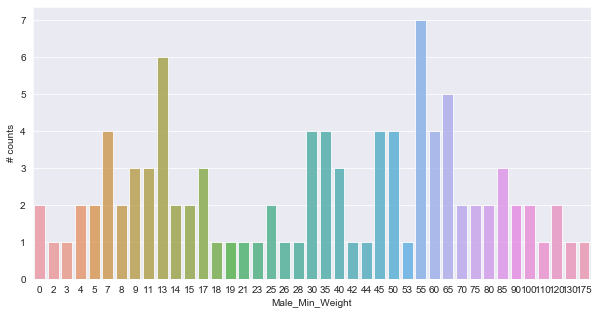

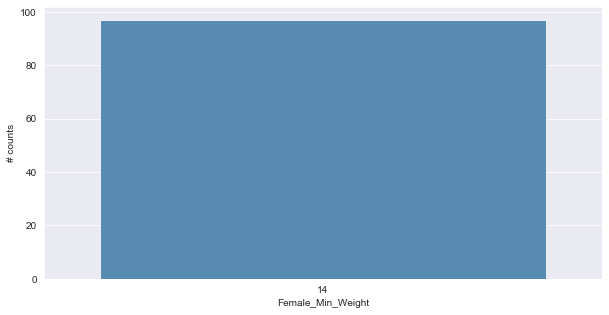

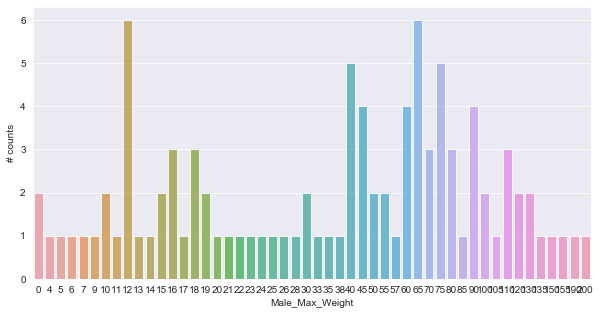

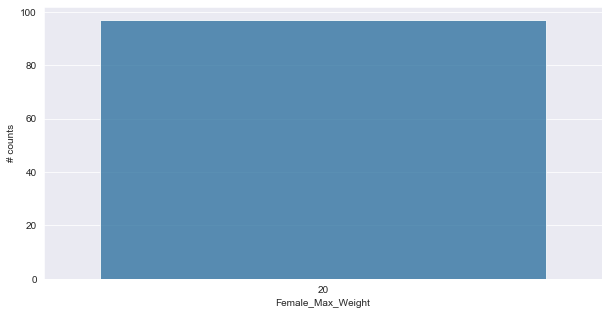

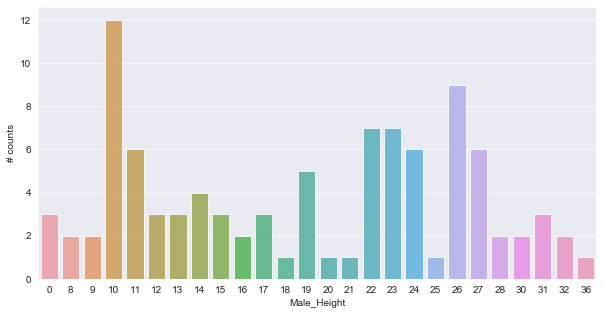

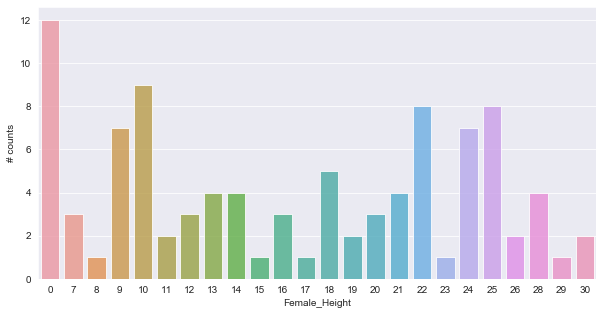

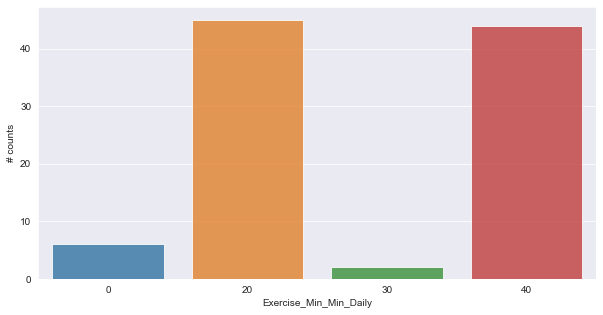

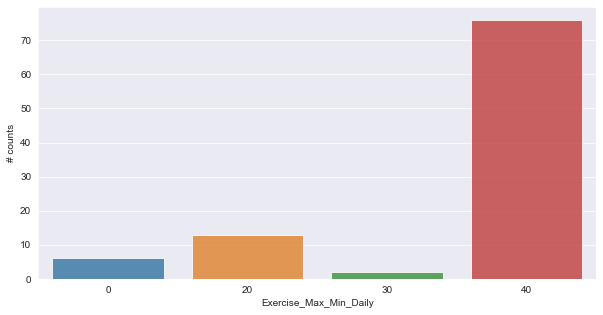

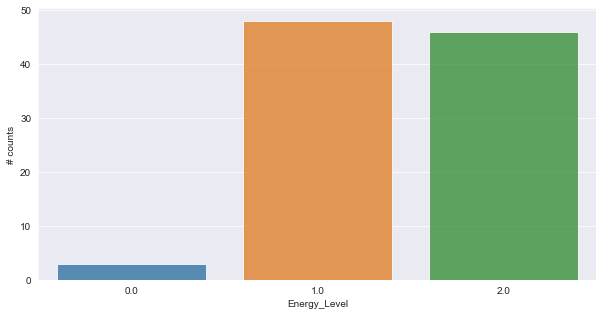

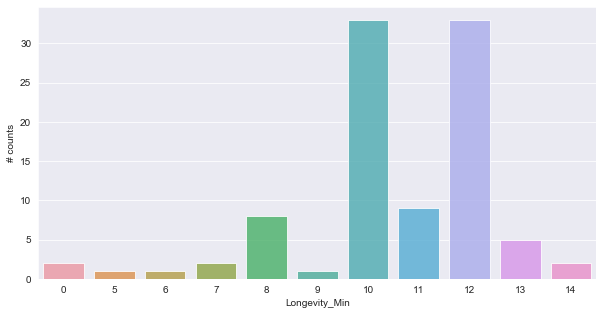

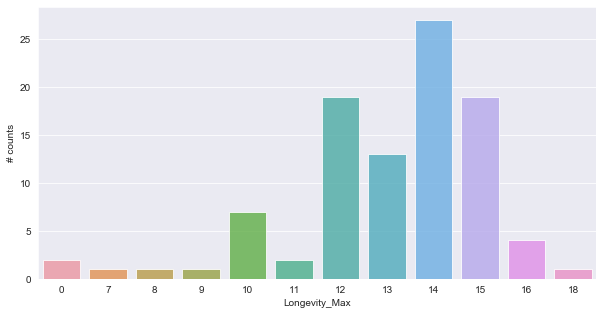

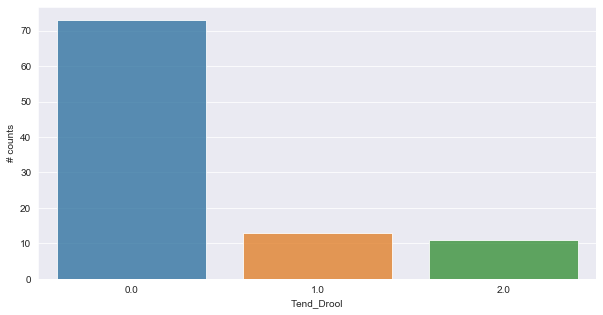

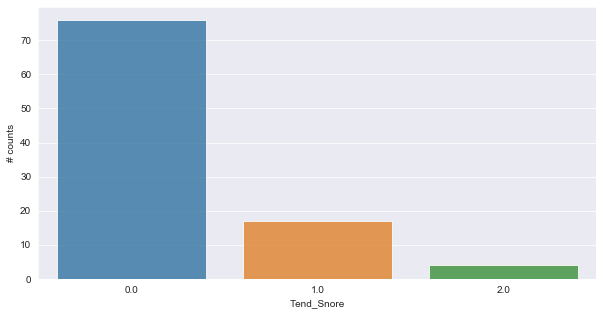

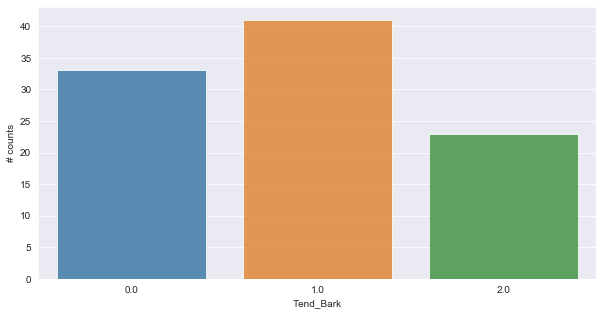

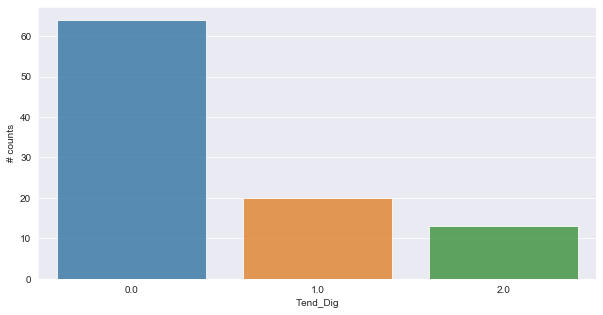

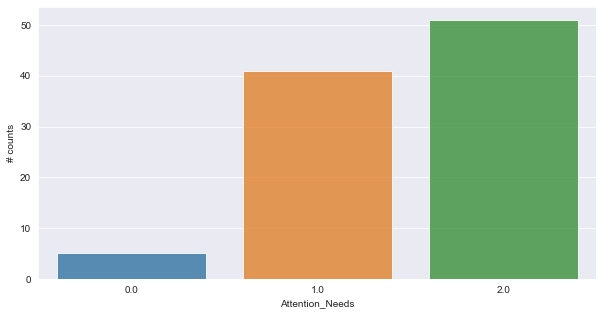

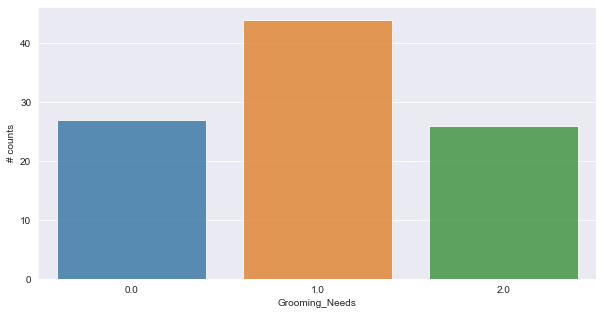

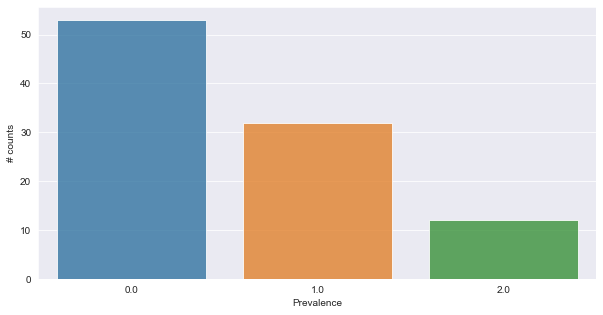

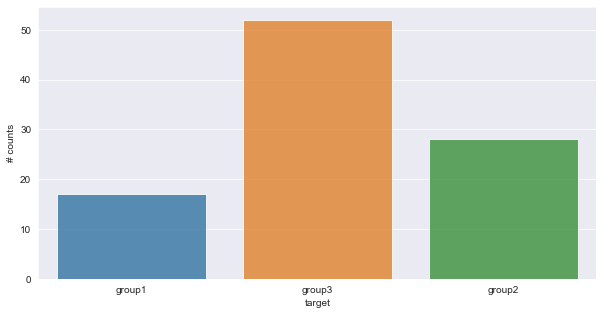

In [25]:
#Data exploration on graphs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

for column in list(df.columns):
    plt.figure(figsize = (10,5))
    sns.countplot(df[column], alpha =.80)
#     plt.title('Survivors vs Non-Survivors')
    plt.ylabel('# counts')
    plt.show()

# Decision Tree

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [27]:
clf= DecisionTreeClassifier(max_depth= 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
clf_pred= clf.predict(X_test)
from sklearn.model_selection import GridSearchCV

In [29]:
def gridsearchCV(model):
    param_grid={
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6]}
    return GridSearchCV(model,param_grid, cv=3)

In [30]:
clf_grid=gridsearchCV(clf)
clf_grid.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 12],
                      

In [31]:
clf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [32]:
clf_grid_pred= clf_grid.predict(X_test)

In [33]:
accuracy_score(y_test, clf_grid_pred)
# precision_score(y_test, clf_grid_pred, average='micro')
# recall_score(y_test, clf_grid_pred, average='macro')
# f1_score(y_test, clf_grid_pred, average='weighted')

0.5

In [34]:
evaluate(y_test, clf_grid_pred, 'Decision Tree')

NameError: name 'evaluate' is not defined

In [ ]:
# accuracy_score(y_test, clf_pred)
# precision_score(y_test, clf_pred, average='micro')
# recall_score(y_test, clf_pred, average='macro')
f1_score(y_test, clf_pred, average='weighted')

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import numpy as np
# Create DOT data
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=np.unique(Y).astype('str'),
                           filled=True, rounded=True, special_characters=True)
# Draw graph
graph = graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler().fit(X_train)

# Transform the training and test sets
scaled_data_train = scaler.transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train)
scaled_df_train.head()

In [ ]:
# Instantiate KNeighborsClassifier
Kclf = KNeighborsClassifier(n_neighbors= 7)

# Fit the classifier
Kclf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = Kclf.predict(scaled_data_test)

KNN_eva=evaluate(y_test, test_preds, 'KNN')

In [ ]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average= None)))
    
print_metrics(y_test, test_preds)

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average="micro")
        if f1 > best_score:
            best_k = k
            best_score = f1
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

# BAGGIN TREES FORREST

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
sds=clf.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [ ]:
pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))


In [ ]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7), 
                                 n_estimators=20)

In [ ]:
bagged_tree.fit(X_train, y_train)

In [ ]:
bagg_pred= bagged_tree.predict(X_test)
bagg_pred

In [ ]:
Baggin_eva=evaluate(y_test, bagg_pred, 'Baggin')

In [ ]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

In [ ]:
bagged_tree.score(X_test, y_test)

# Random Forrests

In [ ]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 7)
forest.fit(X_train, y_train)

In [ ]:
forest.score(X_train, y_train)

In [ ]:
forest_pred=forest.predict(X_test)

In [ ]:
forest.score(X_test, y_test)
Forrests_eva=evaluate(y_test, forest_pred, 'Random Forrests')

# Boosting, Adaboost, Gradient boost, and XGBOOST

In [42]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [43]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [44]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [45]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [47]:
ADA_eva=evaluate(y_test, adaboost_test_preds, 'AdaBoost')
GBT_eva=evaluate(y_test, gbt_clf_test_preds, 'GBT')

NameError: name 'evaluate' is not defined

In [48]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='micro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7662337662337663
F1-Score: 0.7662337662337663

Model: Gradient Boosted Trees
Accuracy: 1.0
F1-Score: 1.0

Testing Metrics
Model: AdaBoost
Accuracy: 0.45
F1-Score: 0.45

Model: Gradient Boosted Trees
Accuracy: 0.45
F1-Score: 0.45


# CONFUSION MATRIX

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[2, 0, 2],
       [0, 3, 2],
       [0, 7, 4]])

In [58]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix
classes = ['Group 1', 'Group 2', "Group 3"]

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[3 0 1]
 [0 2 3]
 [1 6 4]]


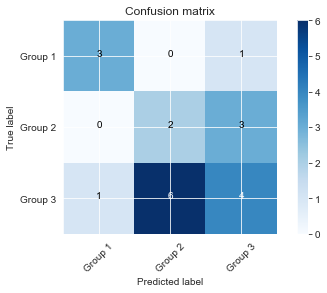

In [60]:
import itertools
plot_confusion_matrix(gbt_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

In [ ]:
gbt_classification_report = classification_report(y_test, clf_test_pred)
print(gbt_classification_report)

In [ ]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, Y, cv=5).mean())

In [ ]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, Y, cv=5).mean())

# XGBOOST

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [ ]:
# Instantiate XGBClassifier
XG_clf = XGBClassifier()

# Fit XGBClassifier
XG_clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = XG_clf.predict(X_train)
XG_test_preds = XG_clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

In [ ]:
XGBoost_eva=evaluate(y_test, XG_test_preds, 'XGBoost')
XGBoost_eva

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [7],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

# SVM

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

In [ ]:
# Print the coefficients
svm_pred= svm_clf.predict(X_test)

In [ ]:
svm_pred

In [ ]:
print_metrics(y_test, svm_pred)
SVM_eva=evaluate(y_test, svm_pred, 'SVM')

In [ ]:
conf_metrix(svm_clf)

In [ ]:
def evaluate(test, pred, model):
    return [model, precision_score(test, pred, average= None), recall_score(test, pred, average= None), accuracy_score(test, pred), f1_score(test, pred, average= None)]
# print metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average= None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average= None)))
# plot confusion metrix
def conf_metrix(model):
    # Create the basic matrix
    plt.imshow(model,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = model.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(model.shape[0]), range(model.shape[1])):
            plt.text(j, i, model[i, j],
                     horizontalalignment='center',
                     color='white' if model[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar()
    plt.show()

# Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler().fit(X_train)
X_train_sca = min_max.transform(X_train)
X_test_sca = min_max.transform(X_test)

# created model
# check the running time
import time
start = time.time()
log_clf = LogisticRegression()
log_clf.fit(X_train_sca, y_train)
log_runtime = time.time() - start

# prediction of  the test set
log_pred = log_clf.predict(X_test_sca)

# evaluated metrix for result table
log_eva = evaluate(y_test, log_pred, 'Logistic Regression ')

In [ ]:
log_eva

# Results

In [ ]:
def evaluate(test, pred, model):
    return [model, precision_score(test, pred, average= None), recall_score(test, pred, average= None), accuracy_score(test, pred), f1_score(test, pred, average= None)]
# print metrics

In [ ]:
log_eva = evaluate(y_test, log_pred, 'Logistic Regression ')
Tree_eva=evaluate(y_test, clf_grid_pred, 'Decision Tree')
Baggin_eva=evaluate(y_test, bagg_pred, 'Baggin')
Forrests_eva=evaluate(y_test, forest_pred, 'Random Forrests')
KNN_eva=evaluate(y_test, test_preds, 'KNN')
ADA_eva=evaluate(y_test, adaboost_test_preds, 'AdaBoost')
GBT_eva=evaluate(y_test, gbt_clf_test_preds, 'GBT')
XGBoost_eva=evaluate(y_test, XG_test_preds, 'XGBoost')
SVM_eva=evaluate(y_test, svm_pred, 'SVM')

In [ ]:
results= pd.DataFrame()

In [ ]:
results= results.append([eva_dummy, log_eva, Tree_eva, Baggin_eva, Forrests_eva, KNN_eva, ADA_eva, GBT_eva, XGBoost_eva, SVM_eva])


In [ ]:
results.columns=["Model", "Precision Score", "Recall Score", "Accuracy Score", "F1 Score"]

In [ ]:
results

In [ ]:
def evaluate_weighted(test, pred, model):
    return [model, precision_score(test, pred, average= "weighted"), recall_score(test, pred, average= "weighted"), accuracy_score(test, pred), f1_score(test, pred, average= "weighted")]
# print metrics

In [ ]:
log_eva2 = evaluate_weighted(y_test, log_pred, 'Logistic Regression ')
Tree_eva2=evaluate_weighted(y_test, clf_grid_pred, 'Decision Tree')
Baggin_eva2=evaluate_weighted(y_test, bagg_pred, 'Baggin')
Forrests_eva2=evaluate_weighted(y_test, forest_pred, 'Random Forrests')
KNN_eva2=evaluate_weighted(y_test, test_preds, 'KNN')
ADA_eva2=evaluate_weighted(y_test, adaboost_test_preds, 'AdaBoost')
GBT_eva2=evaluate_weighted(y_test, gbt_clf_test_preds, 'GBT')
XGBoost_eva2=evaluate_weighted(y_test, XG_test_preds, 'XGBoost')
SVM_eva2=evaluate_weighted(y_test, svm_pred, 'SVM')

In [ ]:
results_weighted= pd.DataFrame()

In [ ]:
results_weighted= results_weighted.append([eva_dummy2, log_eva2, Tree_eva2, Baggin_eva2, Forrests_eva2, KNN_eva2, ADA_eva2, GBT_eva2, XGBoost_eva2, SVM_eva2])


In [ ]:
results_weighted.columns=["Model", "Precision Score", "Recall Score", "Accuracy Score", "F1 Score"]

In [ ]:
results_weighted

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
#dummy accuracy
dummy_clf.score(X, Y)

In [ ]:
eva_dummy2= evaluate_weighted(y_test, dummy_clf.predict(X_test), "Dummy")
eva_dummy= evaluate(y_test, dummy_clf.predict(X_test), "Dummy")

In [ ]:
df.corr()

# ROC curve

In [69]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X = X
y = Y
Curve_clf = OneVsRestClassifier(SVC()).fit(X, y)
Curve_clf.predict(KNN

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: X.shape[1] = 2 should be equal to 18, the number of features at training time